## STIMA PERIODO DI OSCILLAZIONE $T$

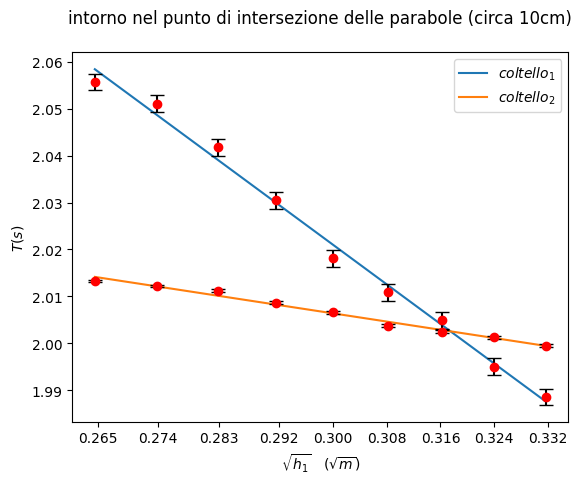


linearità A + BX
    
A: 2.337602491312939 
B: -1.055272604222471
sigmaA: 0.010196523734295259
sigmaB: 0.03398841229855687

sigmaY: 0.00178006450885821    
 
linearità A + BX
    
A: 2.072128349088105 
B: -0.21910905567251696
sigmaA: 0.0029542326522648196
sigmaB: 0.009847441846469107

sigmaY: 0.00028744646585728234    



In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolata, final_val
import os

FILE = os.path.abspath('') + '/../CSV/' + 'misure_fini.csv'
fr = pd.read_csv(FILE)

h1 = (np.array(fr['d'])) * 0.01 # m
h1_sqrt = np.sqrt(h1)

# deviazione standard della media con correzione di bessel
def err_std(a: np.ndarray) -> np.float64:
    mean = np.mean(a)
    return np.sqrt((np.sum(((a - mean)**2))/(len(a)-1)))# /np.sqrt(len(a))

t1 =np.array(fr["t1"]) # s
t2 =np.array(fr["t2"])
t3 =np.array(fr["t3"])
t4 =np.array(fr["t4"])
T1 =np.array(fr["T1"])
T2 =np.array(fr["T2"])
T3 =np.array(fr["T3"])
T4 =np.array(fr["T4"])

err_stdt = np.array([err_std(np.array([t1[i],t2[i],t3[i],t4[i]])) for i in range(0,len(h1))])
err_stdT = np.array([err_std(np.array([T1[i],T2[i],T3[i],T4[i]])) for i in range(0,len(h1))])

periodo1 = np.array(fr["AVG t"]) # valore medio già calcolato con excel
periodo2 = np.array(fr["AVG T"])

r1 = RettaInterpolata(h1_sqrt,periodo1,weights=1/err_stdt**2)
r2 = RettaInterpolata(h1_sqrt,periodo2,weights=1/err_stdT**2)

plt.plot(r1.x_best,r1.y_best,label="$coltello_1$")
plt.plot(r2.x_best,r2.y_best,label="$coltello_2$")
plt.errorbar(h1_sqrt,periodo1,fmt='o',yerr=r1.sigmaY,color="red",ecolor="black",capsize=5)
plt.errorbar(h1_sqrt,periodo2,fmt='o',yerr=r2.sigmaY,color="red",ecolor="black",capsize=5)

plt.legend()
plt.title("intorno nel punto di intersezione delle parabole (circa 10cm)\n")
plt.xticks(np.round(h1_sqrt,3))
plt.ylabel('$T (s)$')
plt.xlabel("$\sqrt{h_1}\quad(\sqrt{m})$")
plt.show()

print(r1,r2)

## MISURA DEL PERIODO $T*$

usando la formula data con i valori ricavati dalle interpolazioni

$T^* = \frac{T_2(x_a)T_1(x_b)-T_1(x_a)T_2(x_b)}{T_1(x_b)-T_2(x_b)-T_1(x_a)+T_2(x_a)}$

per comodità rinomino le variabili:

$a = T_1(x_a) \quad c = T_1(x_b) \quad
b = T_2(x_a) \quad d = T_2(x_b)$

$T^* = \frac{bc-ad}{c-d-a+b}$

$\sigma_{T^*} = \sqrt{
    \left(\frac{\partial T}{\partial a}\right)^2\sigma_{a}^2 +
    \left(\frac{\partial T}{\partial b}\right)^2\sigma_{b}^2 +
    \left(\frac{\partial T}{\partial c}\right)^2\sigma_{c}^2 +
    \left(\frac{\partial T}{\partial d}\right)^2\sigma_{d}^2
}$

In [12]:
T1 = lambda x: r1.A + r1.B * x # definisco le funzioni come sopra
T2 = lambda x: r2.A + r2.B * x

xa = h1_sqrt[6] # prendo i valori delle x più vicine all'intersezione
xb = h1_sqrt[7]

a = T1(xa) # rinomino le variabili
b = T2(xa)
c = T1(xb)
d = T2(xb)

T = (b*c - a*d)/(c-d-a+b) # calcolo il periodo

sa, sb = r1.sigmaY, r1.sigmaY #err_stdt[6],err_stdt[7] # rinomino i sigma
sc, sd = r2.sigmaY, r2.sigmaY #err_stdT[6],err_stdT[7]

g = (c-d-a+b) # holder per accorciare le formule
f = (b*c-a*d)

dTda = (-d*g+f) / g**2 # derivate parziali
dTdb = (c*g-f) / g**2
dTdc = (b*g-f) / g**2
dTdd = (-a*g+f) / g**2

sigmaT = np.sqrt((dTda*sa)**2 + (dTdb*sb)**2 + (dTdc*sc)**2 + (dTdd*sd)**2)

print('T: ',final_val(T,sigmaT,decimals=4))



T:  2.0026 ± 0.0019 
